# **Walmart Project (Forecasting Sales)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"/content/Walmart DataSet.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# **EDA- Exploratory Data Analysis**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# convert the date column to datetime format with %d-%m-%y
data['Date']=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [5]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [6]:
data.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
data.duplicated().sum()

0

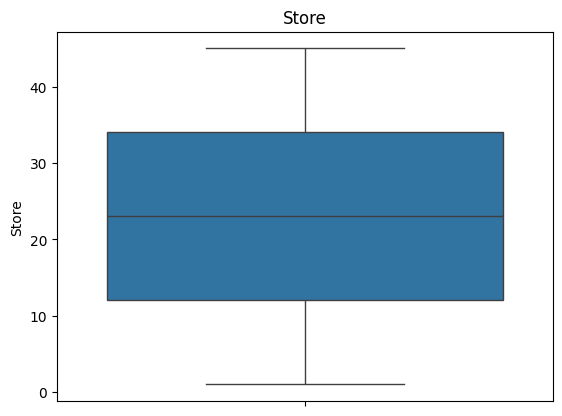

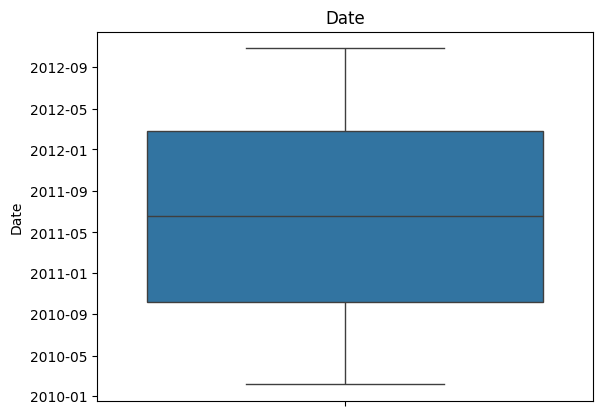

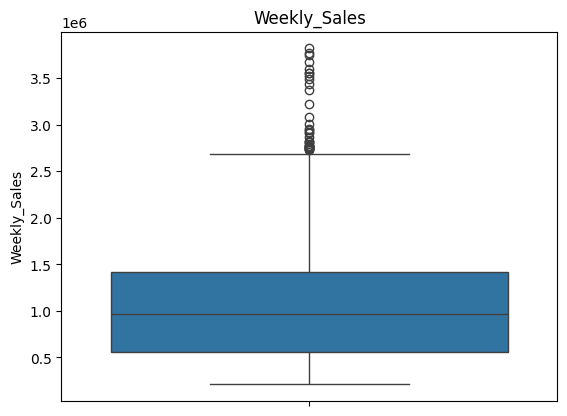

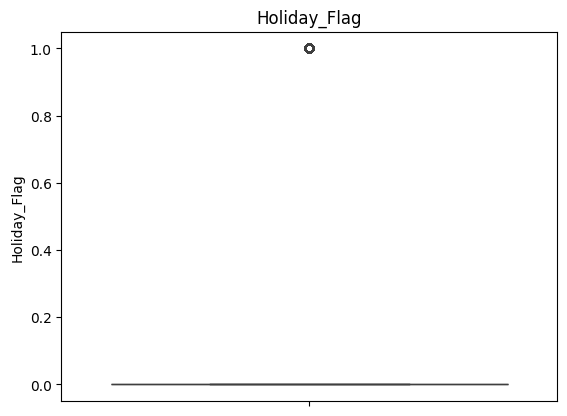

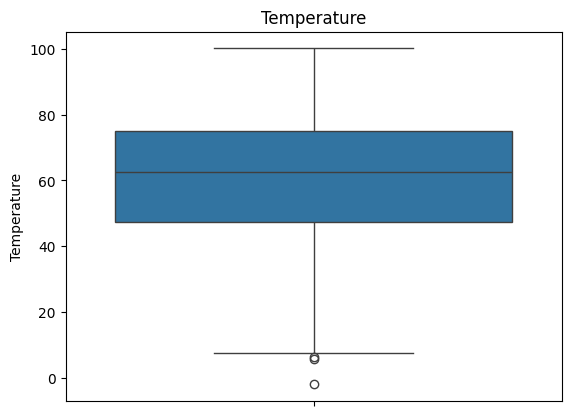

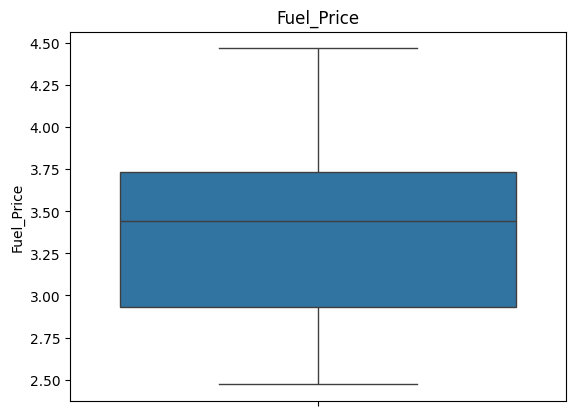

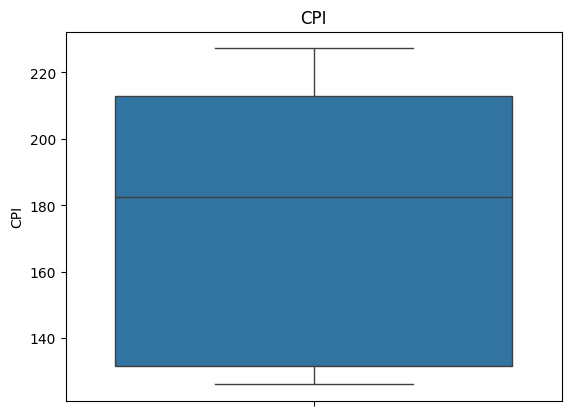

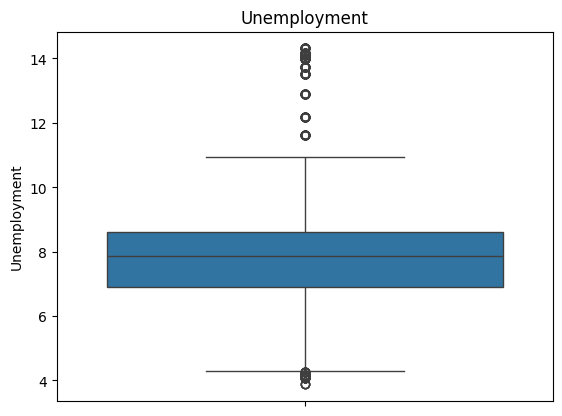

In [8]:
#outlier analysis
for x in data.columns:
  if data[x].dtype!='object':
    sns.boxplot(data[x])
    plt.title(x)
    plt.show()

In [9]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
#handling outliers
outliers=['Weekly_Sales','Unemployment']

In [11]:
for x in outliers:
  q1=data[x].quantile(0.25)
  q3=data[x].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  data=data[(data[x]>=lower) & (data[x]<=upper)]

In [12]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


# **Statistical Data Analysis**

In [13]:
# to find the correlation between weekly_sales and Unemployment column
data[['Weekly_Sales','Unemployment']].corr()

#since the correlation between weekly sales and unemployment column is -0.07 which is close to 0, that implies it is hardly possible that sales are affected by unemployment

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.073227
Unemployment,-0.073227,1.000000


In [14]:
# Group data by store and calculate the correlation for each store
store_correlations = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr()
print(store_correlations)

# Find stores with the most negative correlation (most affected by unemployment)
stores_suffering_most = store_correlations.sort_values(by='Unemployment')
print(stores_suffering_most)


#Visualization (optional):
#plt.figure(figsize=(10, 6))
#sns.barplot(x=stores_suffering_most.index, y=stores_suffering_most.values)
#plt.xlabel("Store")
#plt.ylabel("Correlation with Unemployment")
#plt.title("Stores Most Affected by Unemployment")
#plt.xticks(rotation=45)
#plt.show()

                    Weekly_Sales  Unemployment
Store                                         
1     Weekly_Sales      1.000000     -0.097955
      Unemployment     -0.097955      1.000000
2     Weekly_Sales      1.000000      0.054288
      Unemployment      0.054288      1.000000
3     Weekly_Sales      1.000000     -0.230413
...                          ...           ...
43    Unemployment     -0.201954      1.000000
44    Weekly_Sales      1.000000     -0.780076
      Unemployment     -0.780076      1.000000
45    Weekly_Sales      1.000000     -0.004041
      Unemployment     -0.004041      1.000000

[90 rows x 2 columns]
                    Weekly_Sales  Unemployment
Store                                         
44    Weekly_Sales      1.000000     -0.780076
4     Weekly_Sales      1.000000     -0.633422
13    Weekly_Sales      1.000000     -0.400254
39    Weekly_Sales      1.000000     -0.384681
42    Weekly_Sales      1.000000     -0.356355
...                          ...     

In [15]:
data.set_index(data['Date'],inplace=True)
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
2012-09-28,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667


In [16]:
data.drop('Date',axis=1,inplace=True)
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


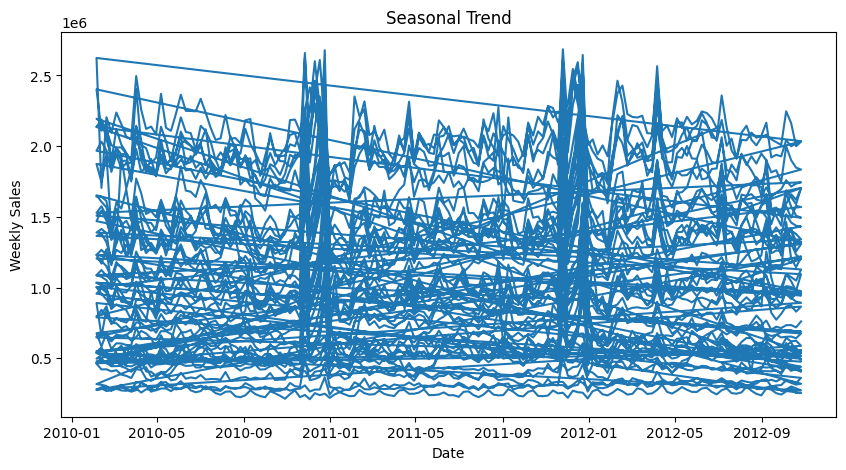

In [17]:
#If the weekly sales show a seasonal trend, when and what could be the reason?
plt.figure(figsize=(10,5))
plt.plot(data.index,data['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Seasonal Trend')
plt.show()

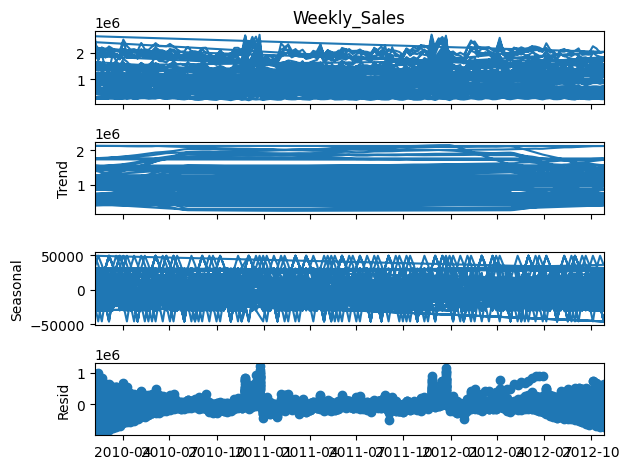

In [18]:
# to check seasonal decompose, period=52 as 52 weeks in 1 year, if it was monthly data then period would have been 12
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(data['Weekly_Sales'],period=52,model='additive')
decomposition.plot()
plt.show()

In [19]:
# Kruskal-Wallis Test is used to check for seasonality without graph
from scipy.stats import kruskal

def seasonality_test(series):
        seasonal = False
        idx = np.arange(len(series.index)) % 52
        H_statistic, p_value = kruskal(series, idx)
        if p_value <= 0.05:
            seasonal = True
        return seasonal

seasonality_test(data['Weekly_Sales'])

True

In [90]:
#creating a new dataframe with only information of weekly sales of store number 22
df22=pd.DataFrame(data[data['Store']==22].groupby('Date')['Weekly_Sales'].sum())
df22

,Weekly_Sales
Date,
2010-02-05,1033017.37
2010-02-12,1022571.25
2010-02-19,988467.61
2010-02-26,899761.48
2010-03-05,1009201.24
...,...
2012-09-28,976479.51
2012-10-05,1009887.36
2012-10-12,1004039.84


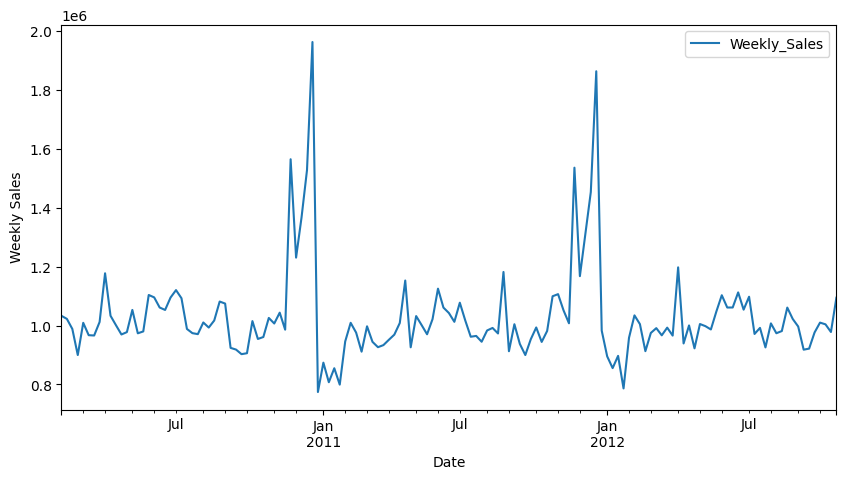

In [91]:
# plot of weekly sales of store number 22
df22.plot(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

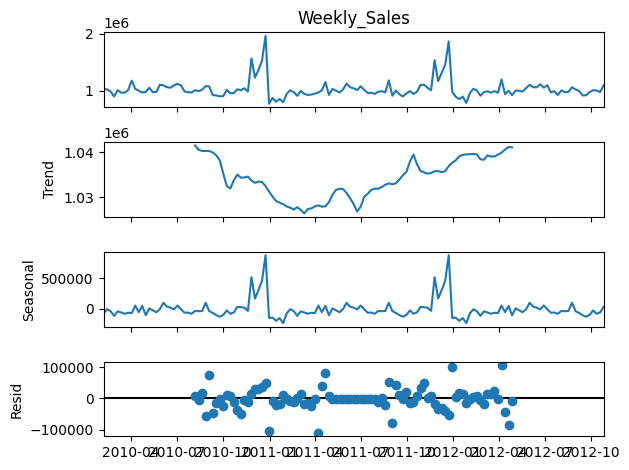

In [96]:
# seasonal decompose of store 22
decomposition1= seasonal_decompose(df22['Weekly_Sales'],period=52,model='additive')
decomposition1.plot()
plt.show()

# seasonality is around the beginning of each year, it might be because of new year people tend to shop more as compared to rest of the year therefore sales are increased

In [23]:
#Does temperature affect the weekly sales in any manner?
data[['Weekly_Sales','Temperature']].corr()

#since correlation between temperatrue and weekly sales is -0.04 which is close to 0, hance we can say there's hardly any correlation i.e. temperature does not affect sales

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.040918
Temperature,-0.040918,1.000000


In [24]:
#How is the Consumer Price index affecting the weekly sales of various stores?
data[['Weekly_Sales','CPI']].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.082957
CPI,-0.082957,1.000000


In [25]:
#store wise correlation of weekly sales and CPI
affected_data= data.groupby('Store')[['Weekly_Sales','CPI']].corr()
print(affected_data)

most_affected= affected_data.sort_values(by='CPI')
print(most_affected)

                    Weekly_Sales       CPI
Store                                     
1     Weekly_Sales      1.000000  0.225408
      CPI               0.225408  1.000000
2     Weekly_Sales      1.000000 -0.063786
      CPI              -0.063786  1.000000
3     Weekly_Sales      1.000000  0.317250
...                          ...       ...
43    CPI              -0.285686  1.000000
44    Weekly_Sales      1.000000  0.740150
      CPI               0.740150  1.000000
45    Weekly_Sales      1.000000 -0.023548
      CPI              -0.023548  1.000000

[90 rows x 2 columns]
                    Weekly_Sales       CPI
Store                                     
36    Weekly_Sales      1.000000 -0.915095
14    Weekly_Sales      1.000000 -0.498495
35    Weekly_Sales      1.000000 -0.424107
30    Weekly_Sales      1.000000 -0.298188
43    Weekly_Sales      1.000000 -0.285686
...                          ...       ...
29    CPI              -0.072530  1.000000
7     CPI               0.28904

In [26]:
#Top performing stores according to the historical data.
top=data.groupby('Store')['Weekly_Sales'].sum()#.sort_values(ascending=False)
top.sort_values(ascending=False)

,Weekly_Sales
Store,
20,2.800237e+08
14,2.761276e+08
2,2.687221e+08
13,2.682025e+08
10,2.556789e+08
27,2.480387e+08
4,2.446487e+08
1,2.224028e+08
6,2.210286e+08


In [27]:
#The worst performing store, and how significant is the difference between the highest and lowest performing stores.
low=data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True)
low

,Weekly_Sales
Store,
38,7.347379e+06
12,1.638671e+07
28,2.110677e+07
33,3.716022e+07
44,4.329309e+07
5,4.547569e+07
36,5.341221e+07
3,5.758674e+07
30,6.271689e+07


In [28]:
highest=top.max()
lowest=low.min()
difference=highest-lowest
print(f'the significant difference between highest and lowest sale is {difference}')

the significant difference between highest and lowest sale is 272676355.92


# **Model Building**

**ADFuller Test for stationarity**

In [29]:
# ADFuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Weekly_Sales'])
print('P_value',result[1])

P_value 4.619944083792818e-05


In [30]:
#since pval>0.05, there data is not stationary, so we will now make the data stationary
log_df=np.log(data['Weekly_Sales'])
log_df.dropna(inplace=True)

In [31]:
mean=log_df.rolling(window=52).mean()

In [32]:
# Differencing
new_df= log_df- mean
new_df.dropna(inplace=True)

In [33]:
result=adfuller(new_df)
print('P_value',result[1])

P_value 5.2909719501951215e-16


In [34]:
#second order differencing
second_diff=new_df.diff().dropna()
result=adfuller(second_diff)
print('P_value',result[1])

P_value 5.044911138248643e-28


**Using predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

In [40]:
#pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.8 MB/s eta 0:00:00


In [73]:
      # to know the best parameters for p,d,q
#from pmdarima import auto_arima
#arima= auto_arima(data['Weekly_Sales'],seasonal=True,trace=True, enforce_invertibility=False, enforce_stationarity=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=157799.770, Time=5.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=158759.855, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=158100.474, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=157926.164, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=158757.860, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=157907.345, Time=2.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=157866.105, Time=2.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=157679.540, Time=4.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=157731.902, Time=6.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=157692.254, Time=12.90 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=157681.736, Time=7.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=157713.834, Time=9.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=157712.672, Time=3.18 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=157608.477, Time=16.49 sec
 AR

In [82]:
# train= data['Weekly_Sales'].iloc[:2960]
# test= data['Weekly_Sales'].iloc[2960:]

**Building Model**

In [75]:
# building model
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima.model import ARIMA

#model=ARIMA(train,order=(5,1,5), enforce_invertibility=False, enforce_stationarity=False)
#model=model.fit()


# SARIMAX Model
model=SARIMAX(df22['Weekly_Sales'],order=(5,1,5),seasonal_order=(5,1,5,52), enforce_invertibility=False,enforce_stationarity=False)
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(5, 1, 5)x(5, 1, 5, 52)   Log Likelihood                   0.000
Date:                            Sun, 15 Dec 2024   AIC                             42.000
Time:                                    10:14:53   BIC                                nan
Sample:                                02-05-2010   HQIC                               nan
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2166         -0        inf      0.000      -1.217      -1.217
ar.L2         -0.9360         -0   

/usr/local/lib/python3.10/dist-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/usr/local/lib/python3.10/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:472: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


**Predictions for Store 22**

In [97]:
# Defining training and testing set of store 22 weekly sales information
train1=df22['Weekly_Sales'].iloc[:75]
test1=df22['Weekly_Sales'].iloc[75:]

In [98]:
# making Predictions
df22['Predictions']=model.predict(start=len(train1),end=len(train1)+len(test1)-1,dynamic=True)
df22[['Weekly_Sales','Predictions']]          # Predictions for first 75 records is NaN, predictions are made only for last (143-74)= 68 records

,Weekly_Sales,Predictions
Date,,
2010-02-05,1033017.37,NaN
2010-02-12,1022571.25,NaN
2010-02-19,988467.61,NaN
2010-02-26,899761.48,NaN
2010-03-05,1009201.24,NaN
...,...,...
2012-09-28,976479.51,1.483318e+06
2012-10-05,1009887.36,1.597960e+06
2012-10-12,1004039.84,1.534783e+06


<Axes: xlabel='Date'>

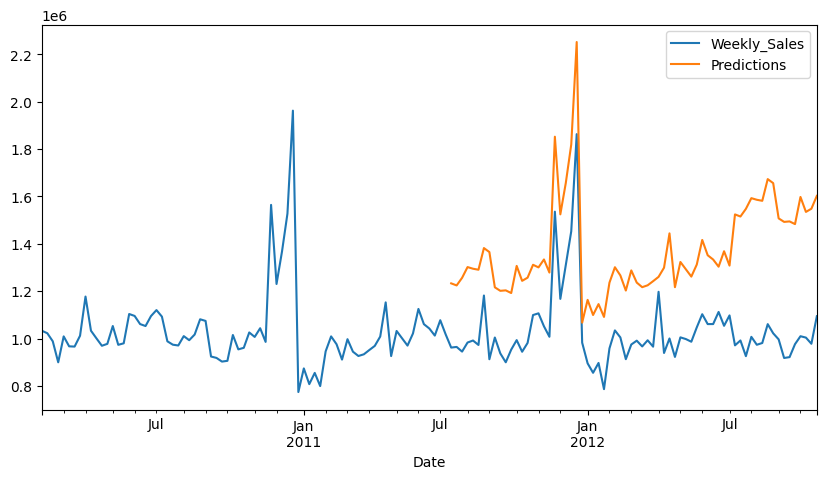

In [99]:
df22[['Weekly_Sales','Predictions']].plot(figsize=(10,5))

**Forecasting for Store 22**

In [100]:
# Forcasting Sales for next 12 weeks for store 22
forecast=model.forecast(steps=12)
forecast

,predicted_mean
2012-11-02,1.212285e+06
2012-11-09,1.176948e+06
2012-11-16,1.128439e+06
2012-11-23,1.672924e+06
2012-11-30,1.298890e+06
2012-12-07,1.438789e+06
2012-12-14,1.582330e+06
2012-12-21,1.999425e+06
2012-12-28,1.111048e+06
2013-01-04,1.026683e+06


<Axes: xlabel='Date'>

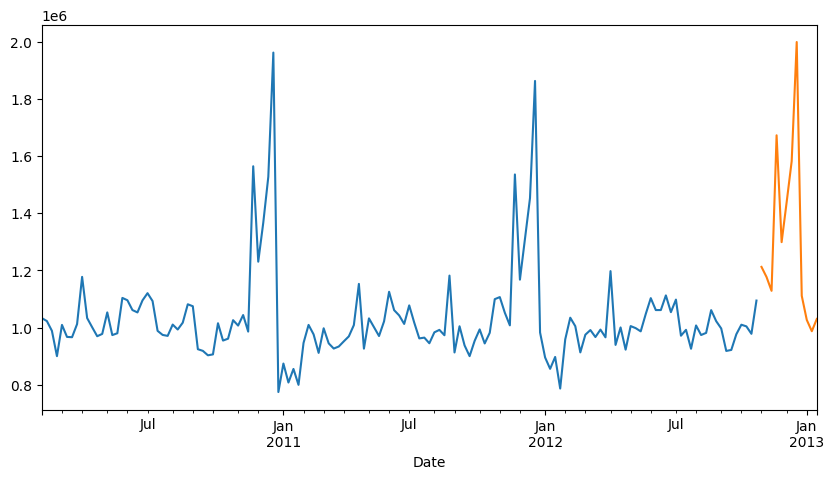

In [102]:
plt.figure(figsize=(10,5))
df22['Weekly_Sales'].plot()
forecast.plot()

**Sales forcasting for all the stores for next 12 weeks**

In [113]:
from statsmodels.tsa.arima.model import ARIMA

# Function to forecast sales for a single store
def forecast_store_sales(store_data, periods=12):
    """Forecasts sales for a given store using ARIMA model.

    Args:
        store_data: DataFrame containing weekly sales for a single store.
        periods: Number of weeks to forecast.

    Returns:
        DataFrame containing forecasted sales.
    """
    try:
        # Fit ARIMA model
        model = ARIMA(store_data['Weekly_Sales'], order=(5, 1, 5))  # Example order
        model = model.fit()

        # Make predictions
        forecast = model.forecast(steps=periods)
        return forecast

    except Exception as e:
        print(f"Error forecasting for store: {e}")
        return pd.Series(index=pd.date_range(start=store_data.index[-1] + pd.Timedelta(days=7), periods=periods), data=[np.nan] * periods)


# Create an empty dictionary to store forecasts
forecasts = {}

# Loop through each unique store
for x in data['Store'].unique():
    # Select data for the current store
    store_x = data[data['Store'] == x].copy()
    store_data = store_x.groupby('Date')['Weekly_Sales'].sum() #Aggregate by date

    #Forecast for that store
    forecasts[x] = forecast_store_sales(store_data.to_frame())

# Combine forecasts into a single DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency 

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
2012-11-02 00:00:00,1.612307e+06,NaN,413643.544833,NaN,327890.831162,NaN,515403.065391,914842.417332,555508.243016,NaN,...,273244.163646,535565.496211,444330.359207,1.614506e+06,NaN,1.341543e+06,563998.808721,611317.150560,347145.214454,764266.367564
2012-11-09 00:00:00,1.567857e+06,NaN,413215.911419,NaN,321239.422126,NaN,534480.854023,886364.487682,534051.367479,NaN,...,292730.983273,518954.197268,468460.802823,1.573340e+06,NaN,1.356080e+06,618505.404657,634058.471495,346998.227280,772581.427971
2012-11-16 00:00:00,1.501194e+06,NaN,407902.343316,NaN,316605.477045,NaN,552133.981043,889669.689579,548729.283953,NaN,...,295289.371660,532209.381971,437267.079091,1.575919e+06,NaN,1.323538e+06,576640.013478,627880.329143,341946.123437,764634.764331
2012-11-23 00:00:00,1.556857e+06,NaN,407506.232528,NaN,326060.639586,NaN,556591.689792,908424.188268,567893.387737,NaN,...,278399.854943,538330.898765,425870.105940,1.583199e+06,NaN,1.339770e+06,519517.475627,596019.952578,353059.111465,781525.088608
2012-11-30 00:00:00,1.617151e+06,NaN,419676.565810,NaN,328908.651932,NaN,571688.205713,926026.424259,565558.526649,NaN,...,270180.122490,532786.384874,428321.816542,1.573682e+06,NaN,1.364532e+06,535504.891264,597699.795680,345594.513203,776164.109299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.034772e+06,NaN,NaN,NaN,NaN,NaN
2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.068132e+06,NaN,NaN,NaN,NaN,NaN
2012-03-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.062853e+06,NaN,NaN,NaN,NaN,NaN
2012-03-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.058959e+06,NaN,NaN,NaN,NaN,NaN


In [115]:
forecast_df.T

,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,...,2012-01-20,2012-01-27,2012-02-03,2012-02-10,2012-02-17,2012-02-24,2012-03-02,2012-03-09,2012-03-16,2012-03-23
1,1.612307e+06,1.567857e+06,1.501194e+06,1.556857e+06,1.617151e+06,1.595219e+06,1.531886e+06,1.535283e+06,1.597051e+06,1.606242e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.136435e+05,4.132159e+05,4.079023e+05,4.075062e+05,4.196766e+05,4.164278e+05,4.122136e+05,4.125442e+05,4.152501e+05,4.194468e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.278908e+05,3.212394e+05,3.166055e+05,3.260606e+05,3.289087e+05,3.252018e+05,3.225677e+05,3.257667e+05,3.283876e+05,3.260803e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.154031e+05,5.344809e+05,5.521340e+05,5.565917e+05,5.716882e+05,5.777481e+05,5.848516e+05,5.876359e+05,5.869908e+05,5.849923e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.148424e+05,8.863645e+05,8.896697e+05,9.084242e+05,9.260264e+05,9.146545e+05,9.089089e+05,9.105763e+05,9.144074e+05,9.110294e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5.555082e+05,5.340514e+05,5.487293e+05,5.678934e+05,5.655585e+05,5.437930e+05,5.485111e+05,5.662683e+05,5.655904e+05,5.473931e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
